,pvalue,chromosome
0,0.047788,ch-11
1,0.993042,ch-3
2,0.785930,ch-6
3,0.730025,ch-11
4,0.456151,ch-11
...,...,...
19995,0.909234,ch-5
19996,0.096785,ch-4
19997,0.370191,ch-10
19998,0.195659,ch-4


,pvalue,chromosome,minuslog10pvalue
12291,0.696318,ch-0,0.157192
6749,0.650940,ch-0,0.186459
6750,0.464360,ch-0,0.333145
15717,0.280956,ch-0,0.551362
6770,0.590818,ch-0,0.228546
...,...,...,...
5960,0.643422,ch-11,0.191504
13757,0.473388,ch-11,0.324783
5957,0.061759,ch-11,1.209298
16256,0.103271,ch-11,0.986021


Text(0.5, 0, 'Chromosome')

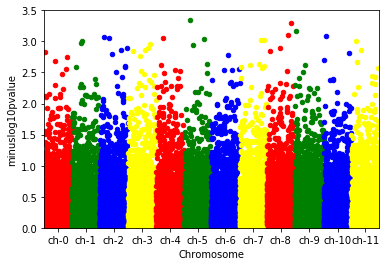

In [21]:
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# some sample data
df = DataFrame({
'pvalue' : uniform.rvs(size=20000),
'chromosome' : ['ch-%i' % i for i in randint.rvs(0,12,size=20000)]})
display(df)
# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df.chromosome = df.chromosome.astype('category')
df.chromosome = df.chromosome.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values('chromosome')
display(df)
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))
display(df_grouped)
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    #print(name,group)
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])
ax.set_xlabel('Chromosome')

In [23]:
import pandas as pd
df_1=pd.read_csv("chromosome_1.csv")
df_1

,pvalue,CHR,P,SNP,BP
0,0.671557,0,0.172917,0,0
1,0.284567,0,0.545815,1,1
2,0.957190,0,0.019002,2,2
3,0.906341,0,0.042708,3,3
4,0.960673,0,0.017424,4,4
...,...,...,...,...,...
19995,0.970353,9,0.013070,19995,19995
19996,0.583780,9,0.233751,19996,19996
19997,0.579232,9,0.237147,19997,19997
19998,0.252404,9,0.597904,19998,19998


Text(0.5, 0, 'Chromosome')

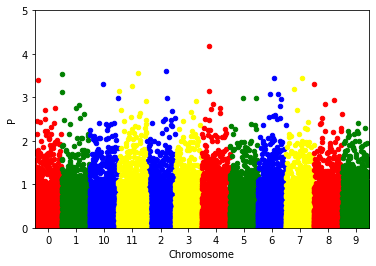

In [27]:
df_grouped = df_1.groupby(('CHR'))
display(df_grouped)
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    #print(name,group)
    group.plot(kind='scatter', x='BP', y='P',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['BP'].iloc[-1] - (group['BP'].iloc[-1] - group['BP'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 5])
ax.set_xlabel('Chromosome')

In [46]:
# location fnding
# https://towardsdatascience.com/geocode-with-python-161ec1e62b89

import geopy
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [40]:
df = pd.read_csv("addresses.csv")
df.head()

,Unnamed: 0,Typ,Nr,Namn,Address1,Address3,Address4,Address5,Telefon
0,0,Butik,102,Fältöversten,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,08/662 22 89
1,1,Butik,104,NaN,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,08/662 50 16
2,2,Butik,106,Garnisonen,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,08/662 64 85
3,3,Butik,110,NaN,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,08/56849241
4,4,Butik,113,Sergel,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,08/21 47 44


In [41]:
df["adrres"] = df["Address1"].astype(str) +','+ df["Address3"].astype(str)  +','+ df["Address4"].astype(str) +','+ df["Address5"].astype(str)+','+ "Sweden"
df

,Unnamed: 0,Typ,Nr,Namn,Address1,Address3,Address4,Address5,Telefon,adrres
0,0,Butik,102,Fältöversten,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,08/662 22 89,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län,S..."
1,1,Butik,104,NaN,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,08/662 50 16,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,..."
2,2,Butik,106,Garnisonen,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,08/662 64 85,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l..."
3,3,Butik,110,NaN,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,08/56849241,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,..."
4,4,Butik,113,Sergel,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,08/21 47 44,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ..."
5,5,Butik,114,PK-Huset,Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms län,08/796 98 10,"Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms l..."
6,6,Butik,116,NaN,Drottninggatan 22,111 51,STOCKHOLM,Stockholms län,08/21 22 60,"Drottninggatan 22,111 51,STOCKHOLM,Stockholms ..."
7,7,Butik,132,Marieberg,Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms län,08/13 30 95,"Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms l..."
8,8,Butik,133,NaN,Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholms län,08/653 39 17,"Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholm..."
9,9,Butik,134,NaN,Lindhagensgatan 118,112 51,STOCKHOLM,Stockholms län,08/656 14 30,"Lindhagensgatan 118,112 51,STOCKHOLM,Stockholm..."


In [47]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['adrres'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)


In [48]:
df

,Unnamed: 0,Typ,Nr,Namn,Address1,Address3,Address4,Address5,Telefon,adrres,location,point,latitude,longitude,altitude
0,0,Butik,102,Fältöversten,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,08/662 22 89,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län,S...","(Karlaplan, Östermalm, Östermalms stadsdelsomr...","(59.3383148, 18.0899599, 0.0)",59.338315,18.089960,0.0
1,1,Butik,104,NaN,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,08/662 50 16,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...","(47, Nybrogatan, Villastaden, Östermalm, Öster...","(59.3372072, 18.0790982, 0.0)",59.337207,18.079098,0.0
2,2,Butik,106,Garnisonen,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,08/662 64 85,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...","(Karlavägen, Östermalm, Östermalms stadsdelsom...","(59.3358717, 18.0995103, 0.0)",59.335872,18.099510,0.0
3,3,Butik,110,NaN,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,08/56849241,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...","(Hötorgshallen, Hötorget, Norrmalm, Norrmalms ...","(59.3343273, 18.0626039, 0.0)",59.334327,18.062604,0.0
4,4,Butik,113,Sergel,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,08/21 47 44,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...","(Drottninggatan, Klarabergsgatan, Norrmalm, No...","(59.3324377, 18.0626176, 0.0)",59.332438,18.062618,0.0
5,5,Butik,114,PK-Huset,Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms län,08/796 98 10,"Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms l...","(Norrlandsgatan, Norrmalm, Norrmalms stadsdels...","(59.3329989, 18.071481, 0.0)",59.332999,18.071481,0.0
6,6,Butik,116,NaN,Drottninggatan 22,111 51,STOCKHOLM,Stockholms län,08/21 22 60,"Drottninggatan 22,111 51,STOCKHOLM,Stockholms ...","(22, Drottninggatan, Norrmalm, Norrmalms stads...","(59.3304823, 18.0649707, 0.0)",59.330482,18.064971,0.0
7,7,Butik,132,Marieberg,Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms län,08/13 30 95,"Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms l...","(Rålambsvägen, Marieberg, Kungsholmens stadsde...","(59.3284404, 18.0177153, 0.0)",59.328440,18.017715,0.0
8,8,Butik,133,NaN,Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholms län,08/653 39 17,"Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholm...","(Kungsholmstorg, Kungsholmen, Kungsholmens sta...","(59.32886965, 18.04308918335665, 0.0)",59.328870,18.043089,0.0
9,9,Butik,134,NaN,Lindhagensgatan 118,112 51,STOCKHOLM,Stockholms län,08/656 14 30,"Lindhagensgatan 118,112 51,STOCKHOLM,Stockholm...","(118, Lindhagensgatan, Stadshagen, Kungsholmen...","(59.3373898, 18.009267, 0.0)",59.337390,18.009267,0.0


In [57]:
#avgvelperstreetper15min
import folium
#from folium.plugins import MarkerCluster
#marker_cluster = MarkerCluster().add_to(map)
map = folium.Map(location=[df['latitude'].iloc[0],df['longitude'].iloc[0]], zoom_start=20)
#map=folium.Map(location=[52.202578,10.614076],zoom_start=20)
for i in range(7):
    tooltip = "point: {}<br>".format(df["adrres"].iloc[i])
    folium.Marker(location=[df['latitude'].iloc[i],df['longitude'].iloc[i]], # adding more details to the popup screen using HTML
                  icon=folium.Icon(color='red', icon_color='white', icon='hamburger', angle=0, prefix='fa'),
                  tooltip=tooltip).add_to(map) 
# for i in range(15):
#     tooltip = "POI: {}<br>".format(poi_664669562["category"].iloc[i])
#     folium.Marker(location=[poi_664669562['poi_lat'].iloc[i],poi_664669562['poi_long'].iloc[i]], # adding more details to the popup screen using HTML
#                   icon=folium.Icon(color='green', icon_color='white', icon='shopping-cart', angle=0, prefix='fa'),
#                   tooltip=tooltip).add_to(map) 
#     folium.Circle([poi_664669562['osm_lat'].iloc[0],poi_664669562['osm_long'].iloc[0]],
#                     radius=300
#                    ).add_to(map)
    
map 
#map.save('map6.html')